<a href="https://colab.research.google.com/github/Diksha-Bisht/Pollution_Analysis/blob/main/Specialization_Project_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project Name -AIR POLLUTION ANALYSIS¶



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Project Type - EDA

    Member -  1. Diksha Bisht
              2. Kanupriya
              3. Shweta Kumari

# **Project Name**    - ***PPOLLUTION ANALYSIS***

##### **Project Type**    - EDA
##### **Contribution**    
-1. Diksha Bisht - Project Handling , Coding, Dashboard Creation

-2. Shweta Kumari & Kanupriya  - Coding

##### **Member**          - Diksha Bisht, Kanupriya, Shweta Kumari

# **Project Summary -**
Increasing pollution levels pose a significant threat to the environment and human health in various states across India and cities worldwide.

The lack of comprehensive analysis and actionable insights regarding pollution hotspots, coupled with diminishing forest cover, exacerbates this issue. Our project aims to address this by conducting in-depth pollution analysis, leveraging data-driven methodologies to create live dashboards, and proposing targeted tree planting strategies per capita to mitigate pollution and enhance environmental sustainability.

## GitHub Link-

# **Problem Statement**

How can comprehensive pollution analysis across Indian states and global cities, coupled with real-time monitoring through live dashboards, be utilized to formulate tailored tree planting strategies per capita as a solution to reduce pollution and bolster environmental health?

## Guidlines-

This project works on 3 datasets; Cities.xlsx, State.xlsx, and TreesDatset.csv

Project is divided into 3 parts working on each of the three datasets:
> **Part-1:** Analysing pollution in Indian states to know nations pollution situation-- States.xlsx

> **Part-2:** Analysing pollution in cities across the globe to know global situation on pollution.-- Cities.xlsx

> **Part-3:** Analysing forests in India to get to know possible way to reduce pollution by planting more trees. -- TreeDataset.csv

The three datasets are provided in folder named Dataset.

## ----------- Lets Begin !! -----------

# Importing Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
imputer=SimpleImputer()
import requests
from bs4 import BeautifulSoup
import sys
import folium

# **--------------- Part-I:Working on State Dataset ---------------**


# 1.**Know Your Data**

### Loading Data

In [3]:
statedf=pd.read_excel('/content/drive/MyDrive/MCA-BU/Projects-Sem-1/Dataset/State.xlsx')

### Viewing Dataset

In [4]:
statedf.head()

,State,AQI,PM2.5,PM10,Temp,Humidity,Status
0,Haryana,164,84,116,23,56,Unhealthy
1,Punjab,125,47,79,24,36,Unhealthy for Sensitive Group
2,West Bengal,146,68,108,30,44,Unhealthy for Sensitive Group
3,Assam,93,32,58,27,55,Moderate
4,Rajasthan,133,56,103,25,43,Unhealthy for Sensitive Group


### Shape of Dataset

In [5]:
statedf.shape

(34, 7)

### Columns in Dataset

In [6]:
statedf.columns

Index(['State', 'AQI', 'PM2.5', 'PM10', 'Temp', 'Humidity', 'Status'], dtype='object')

### Data Information

In [7]:
statedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   State     34 non-null     object
 1   AQI       34 non-null     int64 
 2   PM2.5     34 non-null     int64 
 3   PM10      34 non-null     int64 
 4   Temp      34 non-null     int64 
 5   Humidity  34 non-null     int64 
 6   Status    34 non-null     object
dtypes: int64(5), object(2)
memory usage: 2.0+ KB


# 2. **Data Preprocessing**

### Handeling Missing Values

In [8]:
# Checking For Missing Values
statedf.isnull().sum()

State       0
AQI         0
PM2.5       0
PM10        0
Temp        0
Humidity    0
Status      0
dtype: int64

<Axes: >

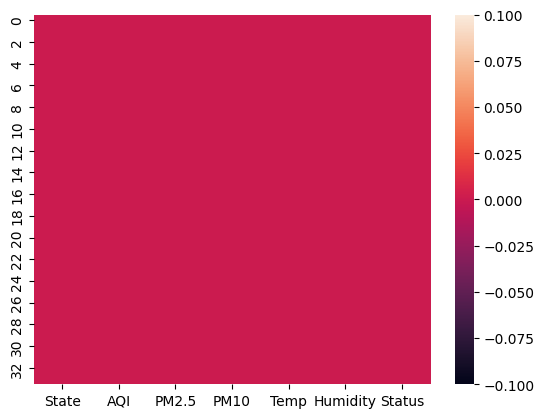

In [9]:
# Visualizing Missing Values
sns.heatmap(statedf.isnull())

*Since there are no missing values, so moving ahead.*

### Handeling Duplicated Values

In [10]:
statedf.duplicated().sum()

0

*Since there are no duplicates, so moving ahead*

# 3. **Understanding Your Data**

## Variable Description

This section describe the meaning and importance of the variables present in Year Dataset

>**State:**  Indian states to analyse situation.

>**AQI:**  Air Quality Index.

>**PM2.5:** This is a fine particulate matter with a diameter of 2.5 micrometers or less. It is considered a major health hazard and is linked to various respiratory and cardiovascular diseases.

>**PM10:** This is a coarse particulate matter with a diameter of 10 micrometers or less. While less harmful than PM2.5, it can still have negative health impacts.

>**Temp:** This can influence the formation and dispersion of pollutants.

>**Humidity:** This can influence the formation and dispersion of pollutants.

>**Status:**  Air quality sitution in diffrent states.

### Getting Statistical Information

In [11]:
statedf.describe()

,AQI,PM2.5,PM10,Temp,Humidity
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,102.705882,40.470588,72.588235,26.176471,50.323529
std,41.287998,23.755363,38.090099,4.316779,11.731131
min,18.000000,4.000000,10.000000,12.000000,31.000000
25%,74.500000,23.250000,37.750000,24.000000,43.000000
50%,105.500000,36.500000,72.000000,28.000000,48.500000
75%,143.750000,55.500000,102.250000,29.000000,58.000000
max,164.000000,87.000000,146.000000,32.000000,77.000000


### Checking Unique Values for Each Variable

In [12]:
for col in statedf.columns:
  print(f"No. of unique values in {col}: {statedf[col].nunique()}")

No. of unique values in State: 34
No. of unique values in AQI: 29
No. of unique values in PM2.5: 31
No. of unique values in PM10: 33
No. of unique values in Temp: 15
No. of unique values in Humidity: 24
No. of unique values in Status: 4


# 4. **Visualization**

>> Line Plot

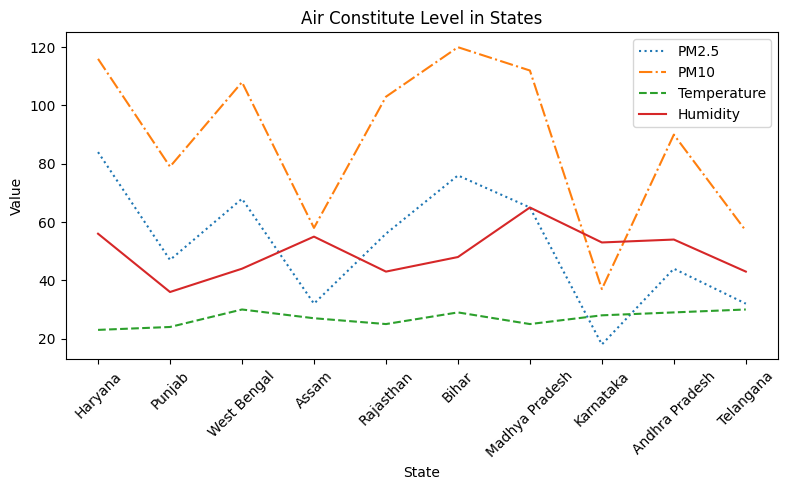

In [13]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the data with line plots
x = statedf['State'].head(10)
sns.lineplot(x=x, y="PM2.5", data=statedf, ax=ax, label="PM2.5", linestyle='dotted')
sns.lineplot(x=x, y="PM10", data=statedf, ax=ax, label="PM10", linestyle='dashdot')
sns.lineplot(x=x, y="Temp", data=statedf, ax=ax, label="Temperature", linestyle='dashed')
sns.lineplot(x=x, y="Humidity", data=statedf, ax=ax, label="Humidity", linestyle='solid')

# Label axes and title
ax.set_xlabel("State")
ax.set_ylabel("Value")
ax.set_title("Air Constitute Level in States")
ax.legend()
ax.grid(False)

# Rotate x-axis labels vertically
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Correlation Analysis:

>> Heatmap -Visualizing Correlation

<ipython-input-14-88373269761c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = statedf.corr()


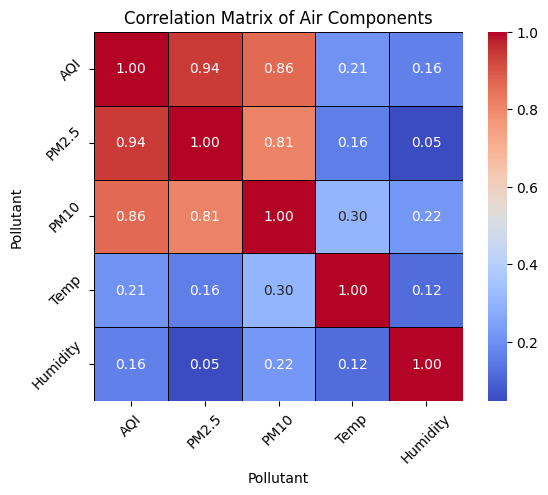

In [14]:
# Calculating the correlation matrix
corr_matrix = statedf.corr()

# Creating the heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            linecolor="black",
            square=True)

plt.xlabel("Pollutant")
plt.ylabel("Pollutant")
plt.title("Correlation Matrix of Air Components")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.grid(False)

# Show the heatmap
plt.show()

*From this we can conclude that PM2.5 is the major contributor in higher AQI*

>> Scatter Plot

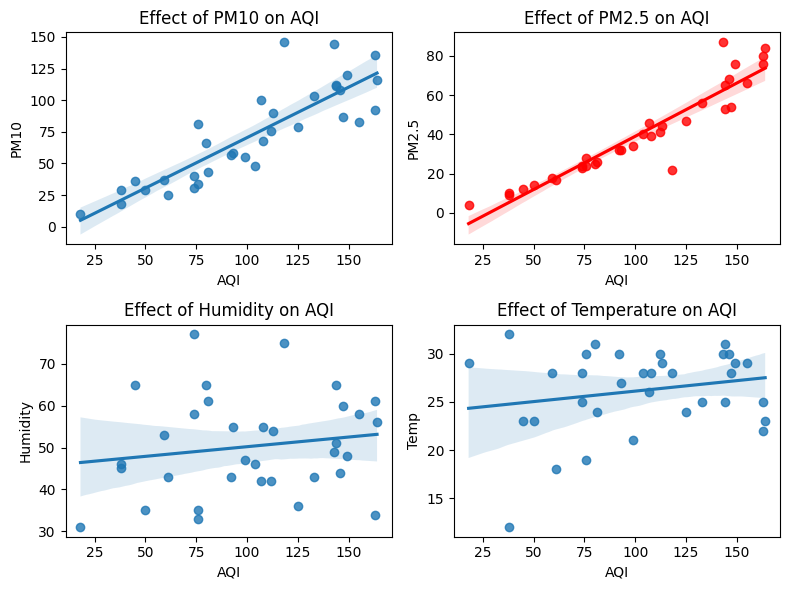

In [15]:
# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot 1 - Upper Left
sns.regplot(x='AQI', y="PM10",data=statedf, ax=axs[0, 0])
axs[0, 0].set_title('Effect of PM10 on AQI')

# Plot 2 - Upper Right
sns.regplot(x='AQI', y="PM2.5",data=statedf, ax=axs[0, 1],color='red')
axs[0, 1].set_title('Effect of PM2.5 on AQI')

# Plot 3 - Lower Left
sns.regplot(x='AQI', y="Humidity",data=statedf, ax=axs[1, 0])
axs[1, 0].set_title('Effect of Humidity on AQI')

# Plot 4 - Lower Right
sns.regplot(x='AQI', y="Temp",data=statedf, ax=axs[1, 1])
axs[1, 1].set_title('Effect of Temperature on AQI')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## National Analysis

>> Distribution Plot

<ipython-input-16-418ec5da2366>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(statedf['AQI'],ax=ax)


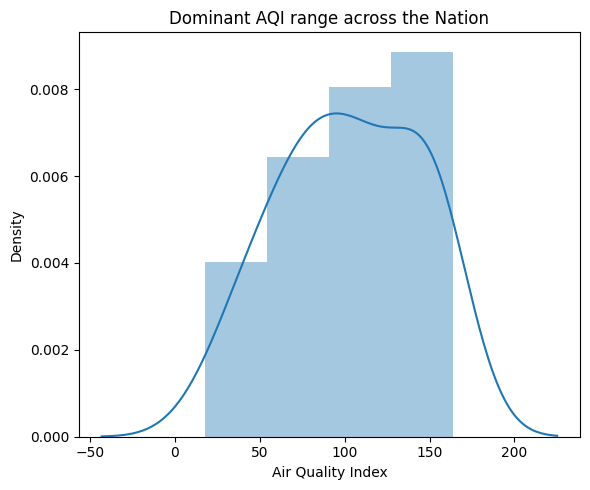

In [16]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
sns.distplot(statedf['AQI'],ax=ax)
# Label axes and title
ax.set_xlabel("Air Quality Index")
ax.set_title("Dominant AQI range across the Nation")
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

*Most of the states have unhealthy environment*

>> Bar Plot

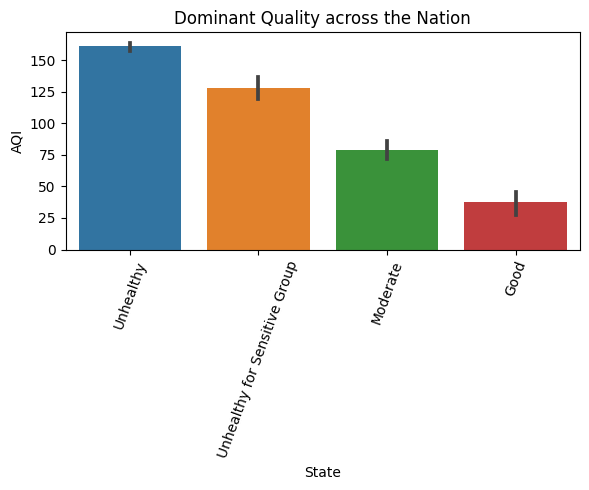

In [17]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x='Status',y='AQI',data=statedf, ax=ax)
# Label axes and title
ax.set_xlabel("State")
ax.set_ylabel("AQI")
ax.set_title("Dominant Quality across the Nation")
ax.grid(False)

# Rotate x-axis labels vertically
plt.xticks(rotation=70)

# Show the plot
plt.tight_layout()
plt.show()

*Highest AQI level is 150 which is very alarming*

# **--------------- Part-II:Working on Cities Across the Globe ---------------**

# 1.**Know Your Data**

### Loading Data

In [18]:
citydf=pd.read_excel('/content/drive/MyDrive/MCA-BU/Projects-Sem-1/Dataset/Cities.xlsx')

### Viewing Dataset

In [19]:
citydf.head()

,Rank,"Major city, country/region_1",AQIUS,Status
0,1,"Delhi, India",213,Very Unhealthy
1,2,"Lahore, Pakistan",199,Unhealthy
2,3,"Tashkent, Uzbekistan",176,Unhealthy
3,4,"Kolkata, India",166,Unhealthy
4,5,"Hangzhou, China",163,Unhealthy


### Shape of Dataset

In [20]:
citydf.shape

(75, 4)

### Columns in Dataset

In [21]:
citydf.columns

Index(['Rank', 'Major city, country/region_1', 'AQIUS', 'Status'], dtype='object')

### Data Information

In [22]:
citydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Rank                          75 non-null     int64 
 1   Major city, country/region_1  75 non-null     object
 2   AQIUS                         75 non-null     int64 
 3   Status                        75 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.5+ KB


# 2. **Data Preprocessing**

## Changing Long Headings to Short

In [23]:
citydf.rename(columns={'Major city, country/region_1':'City'},inplace=True)
print("Sucessful")

Sucessful


## Removing Rank column as it is same as Index

In [24]:
citydf.drop(columns='Rank', inplace=True)
print("Sucessful")

Sucessful


### Handeling Missing Values

In [25]:
# Checking For Missing Values
citydf.isnull().sum()

City      0
AQIUS     0
Status    0
dtype: int64

<Axes: >

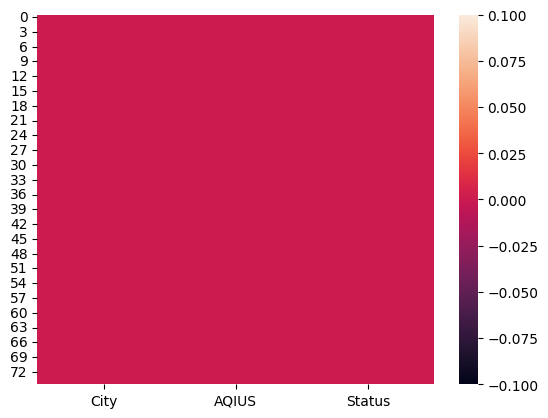

In [26]:
# Visualizing Missing Values
sns.heatmap(citydf.isnull())

*Since there are no missing values, so moving ahead.*

### Handeling Duplicated Values

In [27]:
citydf.duplicated().sum()

0

*SInce there are no duplicates, so moving ahead*

# 3. **Understanding Your Data**

## Variable Description

This section describe the meaning and importance of the variables present in Year Dataset

>**City:**  Cities across the globe (Top 75)

>**AQI US:**  Air Quality Index as per United Nations.

>**Status:**  Air quality sitution in diffrent states.

### Getting Statistical Information

In [28]:
citydf.describe()

,AQIUS
count,75.000000
mean,81.653333
std,40.356015
min,41.000000
25%,55.500000
50%,71.000000
75%,87.000000
max,213.000000


### Checking Unique Values for Each Variable

In [29]:
for col in citydf.columns:
  print(f"No. of unique values in {col}: {citydf[col].nunique()}")

No. of unique values in City: 75
No. of unique values in AQIUS: 52
No. of unique values in Status: 5


# 4. **Visualization**

>> Bar Plot

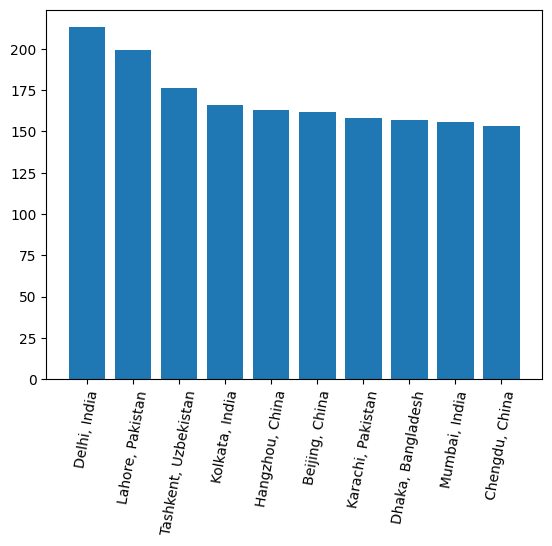

In [30]:
# Create the figure and axes
x=citydf['City'].head(10)
y=citydf['AQIUS'].head(10)

# Create Bar plot
plt.bar(x, y)

# Label axes and title
ax.set_xlabel('Cities')
ax.set_ylabel('Values')
ax.set_title('Pllution in top 10 cities across the Globe')

# Show the plot
plt.xticks(rotation=80)
plt.show()

## Global Analysis:

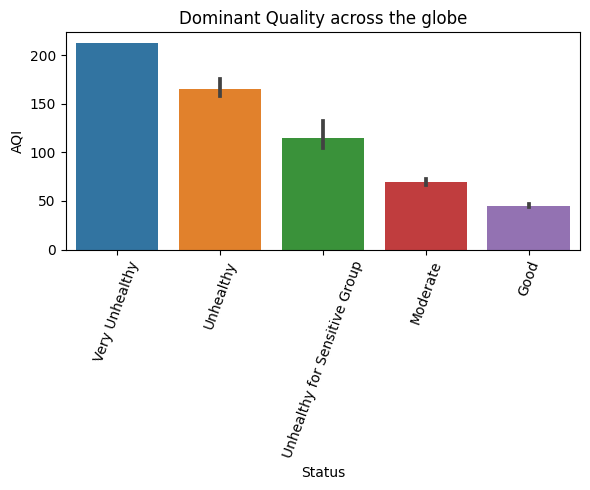

In [31]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x='Status',y='AQIUS',data=citydf, ax=ax)
# Label axes and title
ax.set_xlabel("Status")
ax.set_ylabel("AQI")
ax.set_title("Dominant Quality across the globe")
ax.grid(False)

# Rotate x-axis labels vertically
plt.xticks(rotation=70)

# Show the plot
plt.tight_layout()
plt.show()

*The highest AQI level is 200 which is hazardous*

>> Distribution Plot

<ipython-input-32-e677b5908fdf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citydf['AQIUS'],ax=ax)


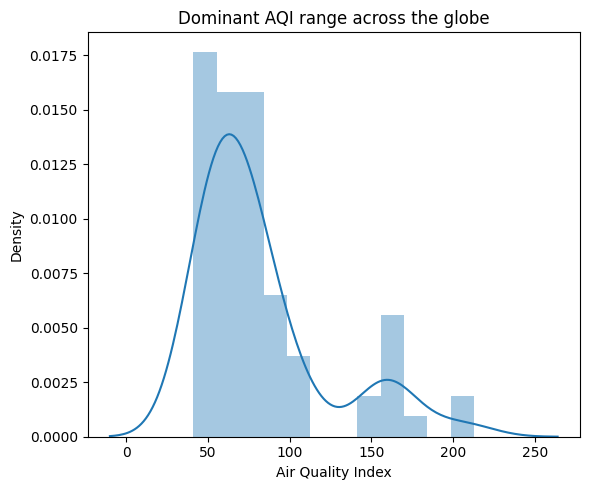

In [32]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
sns.distplot(citydf['AQIUS'],ax=ax)
# Label axes and title
ax.set_xlabel("Air Quality Index")
ax.set_title("Dominant AQI range across the globe")
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

*It is good that major countries have balanced AQI *

# **--------------- Part-III:Working on Forest Dataset ---------------**

# 1.**Know Your Data**

### Loading Data

In [33]:
forest=pd.read_csv('/content/drive/MyDrive/MCA-BU/Projects-Sem-1/Dataset/TreesDataset.csv')

### Viewing Dataset

In [34]:
forest.head()

,State,AQI,Longitude,Latitude,Oxygen Quality (ppm),Tree Count per 1000 sq km,Tree Count per Person
0,Andhra Pradesh,113,79.2068,16.5015,205,130,23
1,Arunachal Pradesh,74,93.7643,27.5764,210,120,25
2,Assam,93,92.9853,26.1717,200,140,22
3,Bihar,149,84.8365,25.7100,195,110,17
4,Chhattisgarh,163,81.6333,21.2647,200,120,20


### Shape of Dataset

In [35]:
forest.shape

(29, 7)

### Columns in Dataset

In [36]:
forest.columns

Index(['State', 'AQI', 'Longitude', 'Latitude', 'Oxygen Quality (ppm)',
       'Tree Count per 1000 sq km', 'Tree Count per Person'],
      dtype='object')

### Data Information

In [37]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      29 non-null     object 
 1   AQI                        29 non-null     int64  
 2   Longitude                  29 non-null     float64
 3   Latitude                   29 non-null     float64
 4   Oxygen Quality (ppm)       29 non-null     int64  
 5   Tree Count per 1000 sq km  29 non-null     int64  
 6   Tree Count per Person      29 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 1.7+ KB


# 2. **Data Preprocessing**

## Changing Long Headings to Short

In [38]:
forest.rename(columns={'Oxygen Quality (ppm)':'OxygenQuality',
                       'Tree Count per 1000 sq km':'Tree Count(K)',
                       'Tree Count per Person':'Tree Count(P)'},inplace=True)
print("Sucessful")

Sucessful


### Handeling Missing Values

In [39]:
# Checking For Missing Values
forest.isnull().sum()

State            0
AQI              0
Longitude        0
Latitude         0
OxygenQuality    0
Tree Count(K)    0
Tree Count(P)    0
dtype: int64

<Axes: >

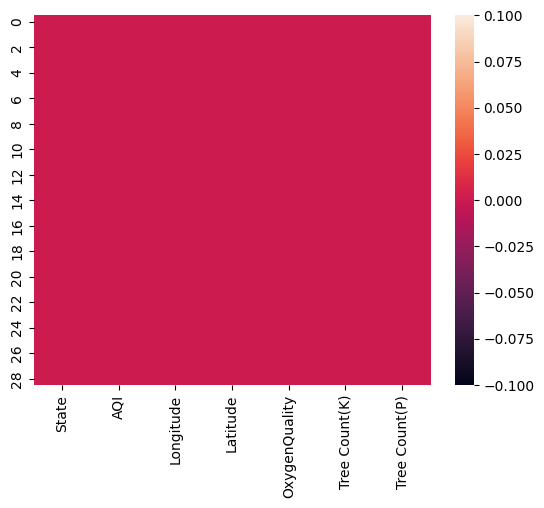

In [40]:
# Visualizing Missing Values
sns.heatmap(forest.isnull())

*Since there are no missing values, so moving ahead.*

### Handeling Duplicated Values

In [41]:
citydf.duplicated().sum()

0

*SInce there are no duplicates, so moving ahead*

# 3. **Understanding Your Data**

## Variable Description

This section describe the meaning and importance of the variables present in Year Dataset

>**State:**  State across the Nation.

>**AQI:**  State AQI.

>**Longitude:**  Longitude of state in map.

>**Latitude:**  Latitude of state in map.

> **Oxygen Quality:** Oxygen level in the state

> **Tree Count(K):** Trees per 1000 square kilometers.

> **Tree Count(P):** Trees per person in state.

### Getting Statistical Information

In [42]:
forest.describe()

,AQI,Longitude,Latitude,OxygenQuality,Tree Count(K),Tree Count(P)
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,99.586207,82.498614,23.471607,210.172414,139.655172,26.758621
std,41.028315,7.303034,5.797607,7.497947,14.010904,7.278418
min,18.000000,72.276400,10.850500,195.000000,110.000000,17.000000
25%,74.000000,76.271100,20.594000,205.000000,130.000000,21.000000
50%,104.000000,79.208800,23.940800,210.000000,140.000000,24.000000
75%,133.000000,88.568300,27.539400,215.000000,150.000000,32.000000
max,164.000000,94.560900,33.579200,225.000000,160.000000,42.000000


### Checking Unique Values for Each Variable

In [43]:
for col in forest.columns:
  print(f"No. of unique values in {col}: {forest[col].nunique()}")

No. of unique values in State: 29
No. of unique values in AQI: 28
No. of unique values in Longitude: 29
No. of unique values in Latitude: 29
No. of unique values in OxygenQuality: 7
No. of unique values in Tree Count(K): 6
No. of unique values in Tree Count(P): 19


# 4. **Visualization**

>> Bar Plot

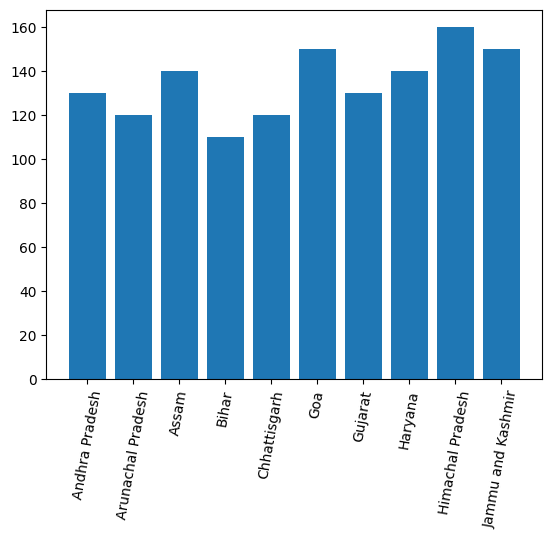

In [44]:
# Create the figure and axes
x=forest['State'].head(10)
y=forest['Tree Count(K)'].head(10)

# Create Bar plot
plt.bar(x, y)

# Label axes and title
ax.set_xlabel('State')
ax.set_ylabel('Forest (per 1K sqkm)')
ax.set_title('Forests in diffrent states of India')

# Show the plot
plt.xticks(rotation=80)
plt.show()

## Correlation Analysis

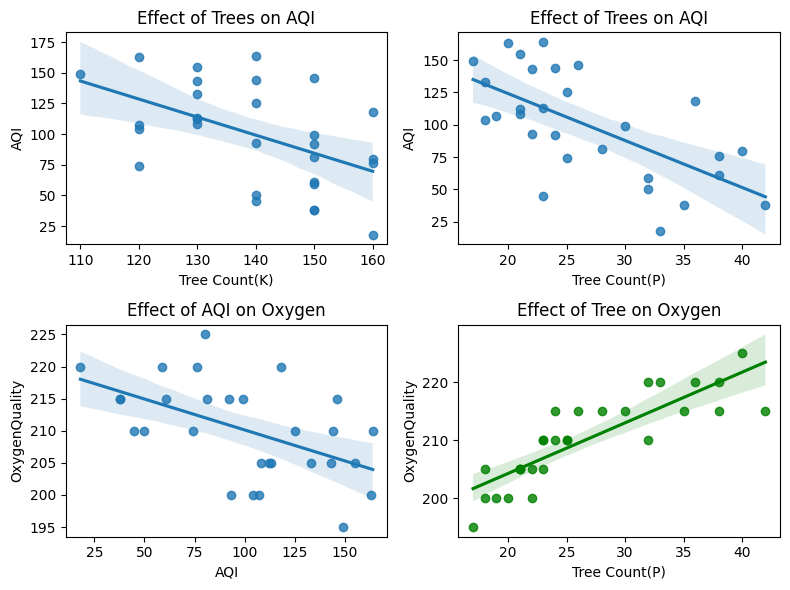

In [50]:
# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot 1 - Upper Left
sns.regplot(x="Tree Count(K)", y='AQI',data=forest, ax=axs[0, 0])
axs[0, 0].set_title('Effect of Trees on AQI')

# Plot 2 - Upper Right
sns.regplot(x="Tree Count(P)", y='AQI',data=forest, ax=axs[0, 1])
axs[0, 1].set_title('Effect of Trees on AQI')

# Plot 3 - Lower Left
sns.regplot(x='AQI', y="OxygenQuality",data=forest, ax=axs[1, 0])
axs[1, 0].set_title('Effect of AQI on Oxygen')

# Plot 4 - Lower Right
sns.regplot(x="Tree Count(P)", y='OxygenQuality',data=forest, ax=axs[1, 1],color='green')
axs[1, 1].set_title('Effect of Tree on Oxygen')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

*We can clearly see that trees improve Air Quality and Reduce AQI*

## Global Analysis:

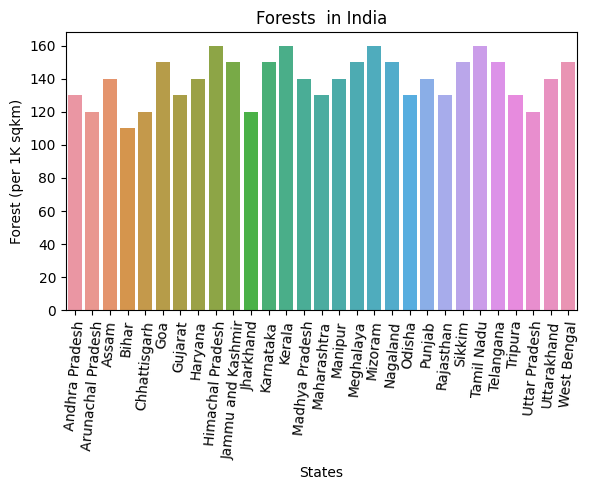

In [46]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x='State',y='Tree Count(K)',data=forest, ax=ax)
# Label axes and title
ax.set_xlabel("States")
ax.set_ylabel("Forest (per 1K sqkm)")
ax.set_title("Forests  in India")
ax.grid(False)

# Rotate x-axis labels vertically
plt.xticks(rotation=85)

# Show the plot
plt.tight_layout()
plt.show()

>> Distribution Plot

<ipython-input-47-3e75e9f44a5e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(forest['Tree Count(K)'], ax=ax)


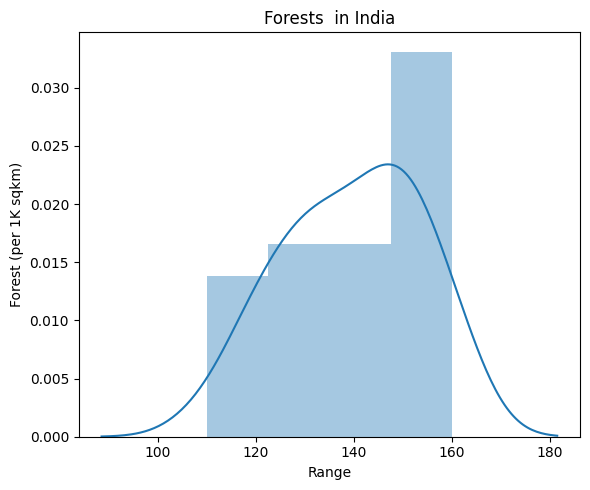

In [47]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
sns.distplot(forest['Tree Count(K)'], ax=ax)
# Label axes and title
ax.set_xlabel("Range")
ax.set_ylabel("Forest (per 1K sqkm)")
ax.set_title("Forests  in India")
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

## Map View

In [48]:
# Create a Folium Map centered at a location (e.g., Delhi)
m = folium.Map(location=[25.6139, 80.2090], zoom_start=4, min_zoom=4, max_zoom=6)

# Loop through the dataset and add markers to the map
for index, row in forest.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Tree Count(P)']*0.4,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        popup=f"State:{row['State']} \n Tree/Person: {row['Tree Count(P)']}"
    ).add_to(m)

# Display the map
m